In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Social_Network_Ads.csv")

In [3]:
df = df.drop(["User ID", "Gender"], axis = 1)

In [4]:
X = df.iloc[:, :-1].values

In [5]:
y = df.iloc[:, -1].values

In [6]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [7]:
sc_X = StandardScaler()

In [8]:
X = sc_X.fit_transform(X)

c:\users\jaide\anaconda3\envs\mlai\lib\site-packages\sklearn\utils\validation.py:590: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
c:\users\jaide\anaconda3\envs\mlai\lib\site-packages\sklearn\utils\validation.py:590: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

In [10]:
from sklearn.svm import SVC

In [11]:
classifier = SVC(kernel = "linear", random_state = 0)

In [12]:
classifier.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=0,
  shrinking=True, tol=0.001, verbose=False)

In [13]:
classifier.score(X_test, y_test)

0.9

In [14]:
y_pred = classifier.predict(X_test)

In [15]:
from sklearn.metrics import confusion_matrix

In [16]:
cm = confusion_matrix(y_test, y_pred)

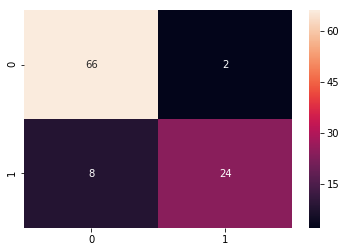

In [17]:
sns.heatmap(cm, annot = True)

In [18]:
from matplotlib.colors import ListedColormap

Text(0.5, 1.0, 'SVC (Testing Data)')

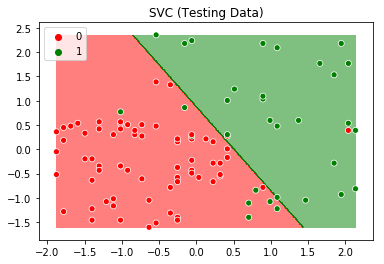

In [19]:
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(X_set[:, 0].min(), X_set[:, 0].max(), 0.01),
                    np.arange(X_set[:, 1].min(), X_set[:, 1].max(), 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape), 
             cmap = ListedColormap(("red", "green")), alpha = 0.5)
sns.scatterplot(X_set[:, 0], X_set[:, 1], palette = {0: "red", 1: "green"}, hue = y_set)
plt.title("SVC (Testing Data)")

Text(0.5, 1.0, 'SVC (Training Data)')

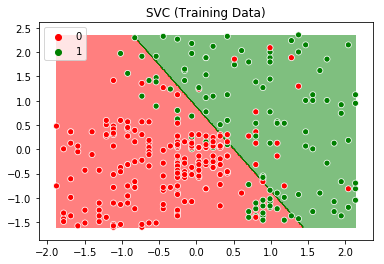

In [20]:
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(X_set[:, 0].min(), X_set[:, 0].max(), 0.01),
                    np.arange(X_set[:, 1].min(), X_set[:, 1].max(), 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape), 
             cmap = ListedColormap(("red", "green")), alpha = 0.5)
sns.scatterplot(X_set[:, 0], X_set[:, 1], palette = {0: "red", 1: "green"}, hue = y_set)
plt.title("SVC (Training Data)")